# Modeling Burned Area by Forest Fires

We will be now proceding with our goal of projecting the area burned by forest fires considering strongly relevant meterological components. Ideally we can identify a model which can accuratly portray our forest fires data and the parameters that can considerably have greater impact in the areas that are devastated by forest fires. We would like to understand in which stance this region is found and how it can be further impacted by the changing of matereological matters which have been of increasing concern due to climate change.

Our next step then will be to test out models.

We will be starting by importating our needed packages and libraries.

In [270]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [271]:
# Loading the data
datafile = pd.read_csv('../data/processed/processed_fires.csv')

# Checking our data tyes and the size of our dataframe
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FFMC    517 non-null    float64
 1   DMC     517 non-null    float64
 2   DC      517 non-null    float64
 3   ISI     517 non-null    float64
 4   temp    517 non-null    float64
 5   RH      517 non-null    int64  
 6   wind    517 non-null    float64
 7   rain    517 non-null    float64
 8   area    517 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 36.5 KB


In [272]:
x = datafile.drop("area", axis= 1)
y = datafile["area"]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

reg = LinearRegression()



In [274]:

# Create and train a Linear Regression model
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.1910822072895693
R-squared: 0.003084527801436643


Our current linear modeling demonstrates a low R-Squared of 0.003084527801436643 leading us to considere a revaluation of the model. Before we anihilate the possibility of using linear regression to predict the areas burned we can perhaps try a regularization of the model.

Mean Squared Error (Ridge): 2.190716074681405
R-squared (Ridge): 0.0032511136377603167


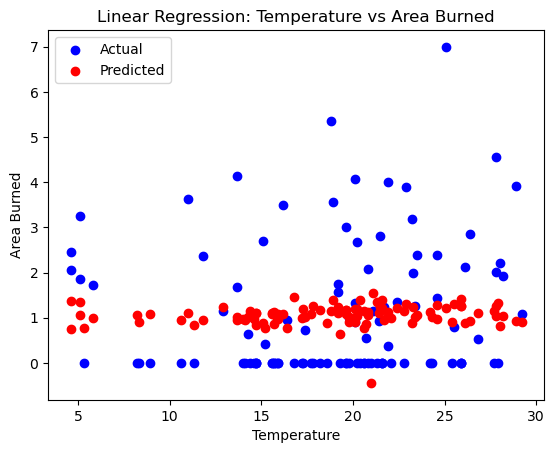

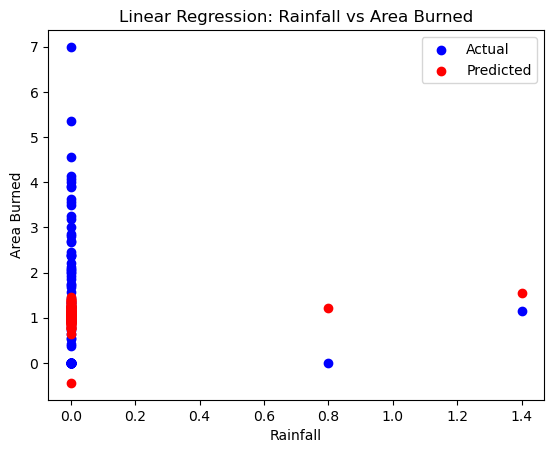

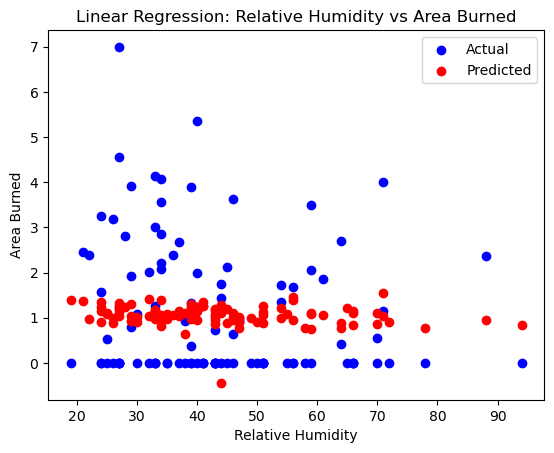

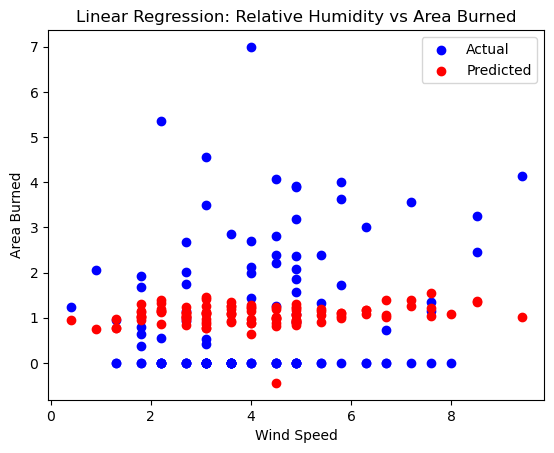

In [275]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Ridge Regression model
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'R-squared (Ridge): {r2_ridge}')

# Plot the results
plt.scatter(X_test['temp'], y_test, label='Actual', color='blue')
plt.scatter(X_test['temp'], y_pred, label='Predicted', color='red')
plt.xlabel('Temperature')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Temperature vs Area Burned')
plt.show()

plt.scatter(X_test['rain'], y_test, label='Actual', color='blue')
plt.scatter(X_test['rain'], y_pred, label='Predicted', color='red')
plt.xlabel('Rainfall')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Rainfall vs Area Burned')
plt.show()

plt.scatter(X_test['RH'], y_test, label='Actual', color='blue')
plt.scatter(X_test['RH'], y_pred, label='Predicted', color='red')
plt.xlabel('Relative Humidity')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Relative Humidity vs Area Burned')
plt.show()

plt.scatter(X_test['wind'], y_test, label='Actual', color='blue')
plt.scatter(X_test['wind'], y_pred, label='Predicted', color='red')
plt.xlabel('Wind Speed')
plt.ylabel('Area Burned')
plt.legend()
plt.title('Linear Regression: Relative Humidity vs Area Burned')
plt.show()